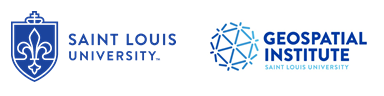

# Assignment 05: Deep Neural Networks in Keras (Part 2B)
## GIS 5092: Applied Machine Learning for GIS and Remote Sensing (Fall 2022)

## Learning Objectives:

* Create neural networks in Keras
* Compare model performance and robustness

# IMPORTANT

## If you are using Google Colab
Whenever you want to keep a copy of this notebook, remember to sign in with your appropriate google account (SLU Google Account is suggested), and save a copy of it in your preferred Google Drive location (preferable location is a seperate folder in your Google Drive for seperate projects, also avoid spaces in folder/file names). Remember to utilize GPU runtime (if needs to use keras). Also remember to pip install necessary packages in every runtime (if needed).

## If you are using Jupyter Notebook
Remember to activate your necessary environment before running codes. Only use Jupyter Notebooks if you are in the lab. If you don't have a GPU machine, then Colab free GPU is suggested.

# How to submit?
Write your answers in code cells with necessary comments. Save a copy of this notebook in your Google Drive / Local Drive by replacing the STUDENT with your SURNAME in CAPS. Upload the completed notebook(s) in Canvas.



---



---



# Data

For this task, you will also have two csvs as datasets. The extracted reflectance csv and the ground truth csv from Part 2A. Bots csvs should have 10,000 samples.

# Your Tasks

1. Read the csvs using <code>pandas</code>.
2. Convert the labels from string class names to some integer codes. You can use the codes provided in Lab 3 or try to use sklearn's [LabelEncoder()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) to do this task.
3. Convert the encoded labels to one hot encoded array (use keras's <code>to_categorical()</code>).
4. Do a 70%-30% train test split.
5. You need to build the following model. Here is the architecture and other requirements:

**DNN**  
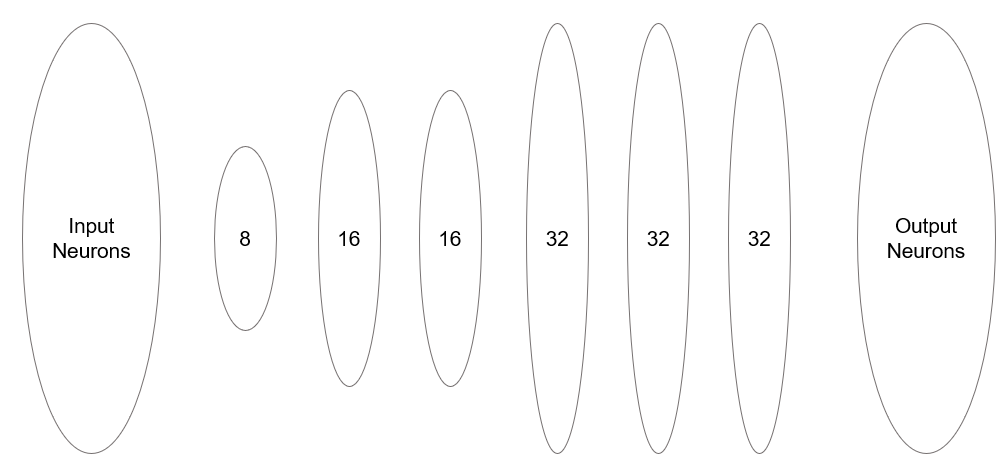

- Use 'categorical_crossentropy' as loss function, 'Adam' as optimizer, 'relu' as intermediate activation functions, 'softmax' as output activation function.
- Start with 0.1 as learning rate, 16 as batch size and 10 as epochs.
- For each model run, get the train-validation loss curve. Tweak around with the learning rate and batch size until you get a reasonable loss curve. No need to change number of epochs if your model converges. If model does not converge (validation loss curve and train loss curve do not meet), then you can increase number of epochs.
- You can increase your learning rates by a factor of 100, e.g., 0.1, 0.01, 0.001, 0.0001, ......
- You can increase batch size in this way: 16, 32, 64 (let's not go beyond 64)
- At least try 5-6 model training with different combinations and note how the loss curve changes with each combination change.
- When you are done with one run (one model fit), for the next run, restart the runtime/kernel before you move on. Do not just overwrite models with different parameters which you may have done in sklearn. Keras DNN models are very heavy with weights so your GPU memory may not handle that. For Jupyter Notebook, restart your kernel by going to Kernel > Restart. For Colab, Runtime > Restart runtime.

**Answer following questions in a word document (name it *lab_5_Part2B_Answers_SURNAME.docx*)**
1. What is the final test accuracy from your best trained model?
2. How many times you trained your model? Provide the loss curve(s) with corresponign learning rate, batch size, epoch information. What change di you notice when you were increasing learning rate? Same question for batch size.
3. What combination of learning rate and batch size you picked as final? Why?

# Deliverables
1. The codes for the tasks in thie notebook. (<code>a5_deep_neural_networks_Part2B_STUDENT.ipynb</code>)
2. The word document file with answers (<code>lab_5_Part2B_Answers_SURNAME.docx</code>)



---



---



# Your Turn

In [1]:
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 43.7 MB/s eta 0:00:00


In [2]:
# Import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rasterio
import geopandas as gpd
import pandas as pd

In [13]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
#read csv file
data = pd.read_csv(r'/content/drive/MyDrive/ML/Lab5/joined_data.csv')

data


,UID,B1,B2,B3,B4,B5,B6,B7,B8,B9,UID_,Label,geometry
0,0,0.010742,0.014450,0.012955,0.019760,0.039444,0.048141,0.053299,0.035660,0.022690,0,Developed,POINT (303242.3259224463 4213611.454142192)
1,1,0.010147,0.014801,0.015106,0.022827,0.032791,0.037399,0.040543,0.041458,0.026901,1,Agriculture,POINT (292930.3478076775 4296054.512689942)
2,2,0.012543,0.016098,0.021454,0.026505,0.029999,0.032837,0.037964,0.055222,0.040756,2,Agriculture,POINT (265203.7998173106 4269581.511377105)
3,3,0.007278,0.012253,0.014145,0.022614,0.045715,0.053421,0.056290,0.035995,0.019882,3,Developed,POINT (238300.4254482407 4296996.469392562)
4,4,0.001968,0.004105,0.001984,0.008255,0.039932,0.054398,0.058777,0.027054,0.011398,4,Forest,POINT (304097.1712689567 4211128.005572716)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,0.011017,0.014786,0.019531,0.025436,0.028946,0.033203,0.037491,0.054993,0.041351,99995,Agriculture,POINT (239809.0334091056 4262490.196149359)
99996,99996,0.009476,0.013092,0.018127,0.022690,0.026978,0.029800,0.034119,0.039246,0.026138,99996,Agriculture,POINT (275318.089183392 4217774.322017217)
99997,99997,0.011948,0.015900,0.021133,0.025696,0.030884,0.033188,0.037689,0.043701,0.031860,99997,Agriculture,POINT (240998.3936112095 4257075.88016049)
99998,99998,0.007294,0.010193,0.012665,0.013550,0.008438,0.008270,0.005829,0.000748,0.000900,99998,Water,POINT (250105.7127266843 4198845.182263786)


In [5]:
from sklearn.utils import shuffle
data = shuffle(data)

# We dont need all the columns, lets just keep the ones that we need
data = data[['Label', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9']]
data

,Label,B1,B2,B3,B4,B5,B6,B7,B8,B9
7143,Agriculture,0.009705,0.012375,0.011368,0.019089,0.045853,0.048004,0.058838,0.033539,0.021393
69058,Agriculture,0.009827,0.013870,0.016418,0.024643,0.038132,0.044708,0.049179,0.051529,0.036484
49366,Agriculture,0.007721,0.012207,0.012802,0.019165,0.037125,0.046326,0.045715,0.037720,0.023270
95289,Developed,0.008057,0.013504,0.011230,0.023346,0.049316,0.058472,0.063309,0.048996,0.026489
87478,Agriculture,0.014465,0.021759,0.025345,0.035843,0.044113,0.048340,0.053680,0.071655,0.056717
...,...,...,...,...,...,...,...,...,...,...
38649,Agriculture,0.005554,0.009293,0.006989,0.013855,0.039154,0.050522,0.053421,0.034729,0.019424
36857,Agriculture,0.009796,0.014282,0.015732,0.021255,0.033691,0.041077,0.042267,0.037766,0.021866
45251,Wetland,0.002899,0.006470,0.003036,0.011246,0.043137,0.054932,0.055649,0.023911,0.010559
362,Agriculture,0.006775,0.009125,0.010254,0.010162,0.003662,0.003815,0.001831,0.000610,0.000534


In [6]:
# Create a clumn named 'Label_int' which has only 0 as values
data['Label_int'] = 0
data

,Label,B1,B2,B3,B4,B5,B6,B7,B8,B9,Label_int
7143,Agriculture,0.009705,0.012375,0.011368,0.019089,0.045853,0.048004,0.058838,0.033539,0.021393,0
69058,Agriculture,0.009827,0.013870,0.016418,0.024643,0.038132,0.044708,0.049179,0.051529,0.036484,0
49366,Agriculture,0.007721,0.012207,0.012802,0.019165,0.037125,0.046326,0.045715,0.037720,0.023270,0
95289,Developed,0.008057,0.013504,0.011230,0.023346,0.049316,0.058472,0.063309,0.048996,0.026489,0
87478,Agriculture,0.014465,0.021759,0.025345,0.035843,0.044113,0.048340,0.053680,0.071655,0.056717,0
...,...,...,...,...,...,...,...,...,...,...,...
38649,Agriculture,0.005554,0.009293,0.006989,0.013855,0.039154,0.050522,0.053421,0.034729,0.019424,0
36857,Agriculture,0.009796,0.014282,0.015732,0.021255,0.033691,0.041077,0.042267,0.037766,0.021866,0
45251,Wetland,0.002899,0.006470,0.003036,0.011246,0.043137,0.054932,0.055649,0.023911,0.010559,0
362,Agriculture,0.006775,0.009125,0.010254,0.010162,0.003662,0.003815,0.001831,0.000610,0.000534,0


In [7]:
# Perform the following operation
for i in range(data.shape[0]):
    label_txt = data.iloc[i, 0]

    if label_txt=='Water':
        data.iloc[i, -1] = 1
    elif label_txt=='Wetland':
        data.iloc[i, -1] = 2
    elif label_txt=='Developed':
        data.iloc[i, -1] = 3
    elif label_txt=='Forest':
        data.iloc[i, -1] = 4
    elif label_txt=='Agriculture':
        data.iloc[i, -1] = 5
    elif label_txt=='Barren':
        data.iloc[i, -1] = 6
    elif label_txt=='Herbaceous':
        data.iloc[i, -1] = 7
    elif label_txt=='Shrubland':
        data.iloc[i, -1] = 8

data

,Label,B1,B2,B3,B4,B5,B6,B7,B8,B9,Label_int
7143,Agriculture,0.009705,0.012375,0.011368,0.019089,0.045853,0.048004,0.058838,0.033539,0.021393,5
69058,Agriculture,0.009827,0.013870,0.016418,0.024643,0.038132,0.044708,0.049179,0.051529,0.036484,5
49366,Agriculture,0.007721,0.012207,0.012802,0.019165,0.037125,0.046326,0.045715,0.037720,0.023270,5
95289,Developed,0.008057,0.013504,0.011230,0.023346,0.049316,0.058472,0.063309,0.048996,0.026489,3
87478,Agriculture,0.014465,0.021759,0.025345,0.035843,0.044113,0.048340,0.053680,0.071655,0.056717,5
...,...,...,...,...,...,...,...,...,...,...,...
38649,Agriculture,0.005554,0.009293,0.006989,0.013855,0.039154,0.050522,0.053421,0.034729,0.019424,5
36857,Agriculture,0.009796,0.014282,0.015732,0.021255,0.033691,0.041077,0.042267,0.037766,0.021866,5
45251,Wetland,0.002899,0.006470,0.003036,0.011246,0.043137,0.054932,0.055649,0.023911,0.010559,2
362,Agriculture,0.006775,0.009125,0.010254,0.010162,0.003662,0.003815,0.001831,0.000610,0.000534,5


In [8]:
# Import to_categorical
from keras.utils import to_categorical

# Convert integer labels to one-hot encoded arrays
integer_labels = data['Label_int']
num_classes = 9
one_hot_encoded = to_categorical(integer_labels, num_classes=num_classes)






In [9]:
data = data.drop(columns=['Label'])
data

,B1,B2,B3,B4,B5,B6,B7,B8,B9,Label_int
7143,0.009705,0.012375,0.011368,0.019089,0.045853,0.048004,0.058838,0.033539,0.021393,5
69058,0.009827,0.013870,0.016418,0.024643,0.038132,0.044708,0.049179,0.051529,0.036484,5
49366,0.007721,0.012207,0.012802,0.019165,0.037125,0.046326,0.045715,0.037720,0.023270,5
95289,0.008057,0.013504,0.011230,0.023346,0.049316,0.058472,0.063309,0.048996,0.026489,3
87478,0.014465,0.021759,0.025345,0.035843,0.044113,0.048340,0.053680,0.071655,0.056717,5
...,...,...,...,...,...,...,...,...,...,...
38649,0.005554,0.009293,0.006989,0.013855,0.039154,0.050522,0.053421,0.034729,0.019424,5
36857,0.009796,0.014282,0.015732,0.021255,0.033691,0.041077,0.042267,0.037766,0.021866,5
45251,0.002899,0.006470,0.003036,0.011246,0.043137,0.054932,0.055649,0.023911,0.010559,2
362,0.006775,0.009125,0.010254,0.010162,0.003662,0.003815,0.001831,0.000610,0.000534,5


In [10]:
from sklearn.model_selection import train_test_split

# Split your data into features (X) and labels (y)
X = data.drop(columns=['Label_int'])  # Features
y = data['Label_int']  # Labels

# Perform the 70%-30% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)



In [11]:

X_train = X_train.to_numpy().astype('float32')
X_test = X_test.to_numpy().astype('float32')


Batch Size: 16 and Learning Rate : 0.1
Epoch 1/10
4375/4375 [==============================] - 30s 5ms/step - loss: 0.4592 - accuracy: 0.8320 - val_loss: 0.4456 - val_accuracy: 0.8371
Epoch 2/10
4375/4375 [==============================] - 22s 5ms/step - loss: 0.4571 - accuracy: 0.8322 - val_loss: 0.4447 - val_accuracy: 0.8371
Epoch 3/10
4375/4375 [==============================] - 21s 5ms/step - loss: 0.4567 - accuracy: 0.8322 - val_loss: 0.4448 - val_accuracy: 0.8371
Epoch 4/10
4375/4375 [==============================] - 23s 5ms/step - loss: 0.4564 - accuracy: 0.8322 - val_loss: 0.4513 - val_accuracy: 0.8371
Epoch 5/10
4375/4375 [==============================] - 23s 5ms/step - loss: 0.4566 - accuracy: 0.8322 - val_loss: 0.4460 - val_accuracy: 0.8371
Epoch 6/10
4375/4375 [==============================] - 21s 5ms/step - loss: 0.4567 - accuracy: 0.8322 - val_loss: 0.4445 - val_accuracy: 0.8371
Epoch 7/10
4375/4375 [==============================] - 23s 5ms/step - loss: 0.4571 - accu

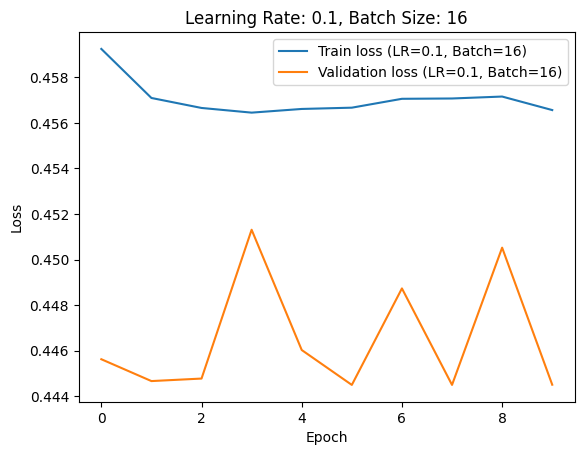

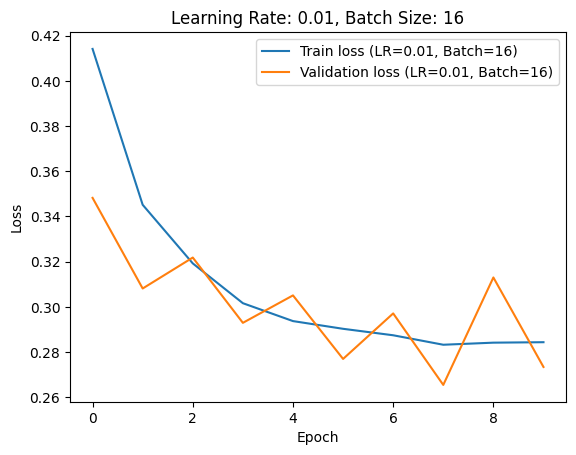

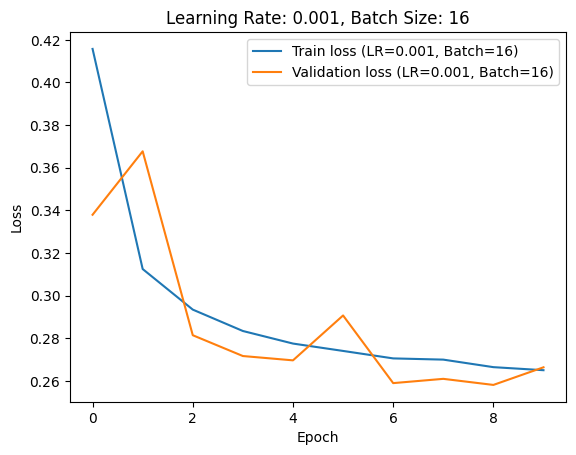

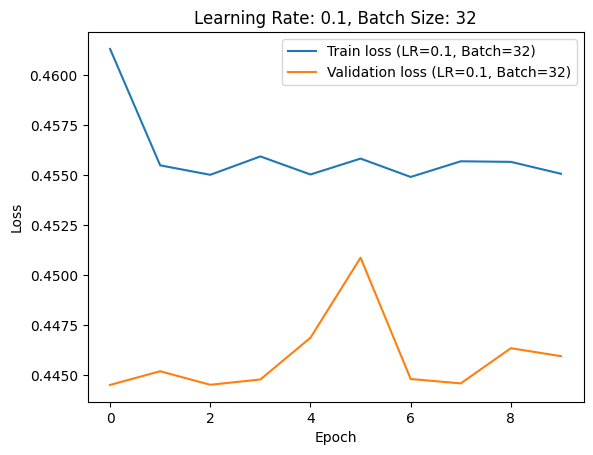

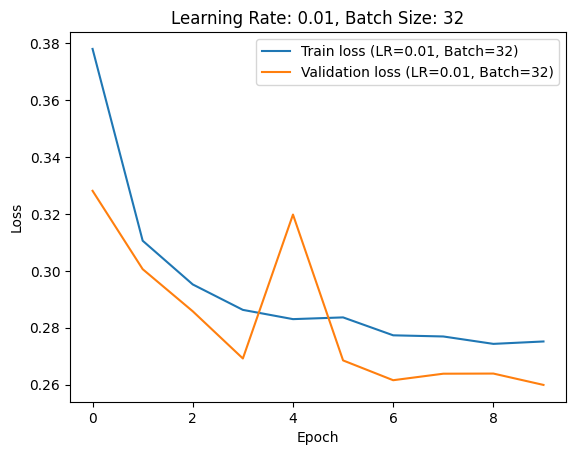

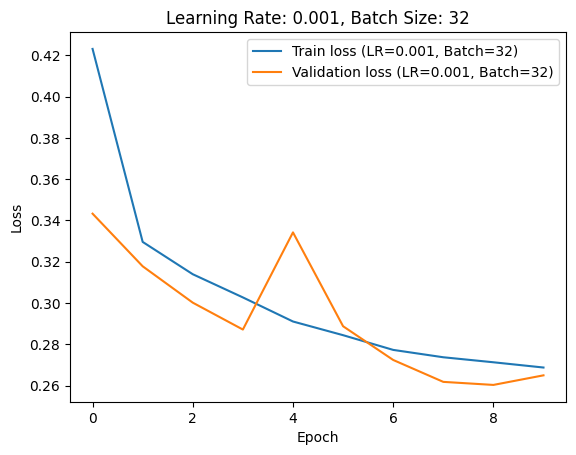

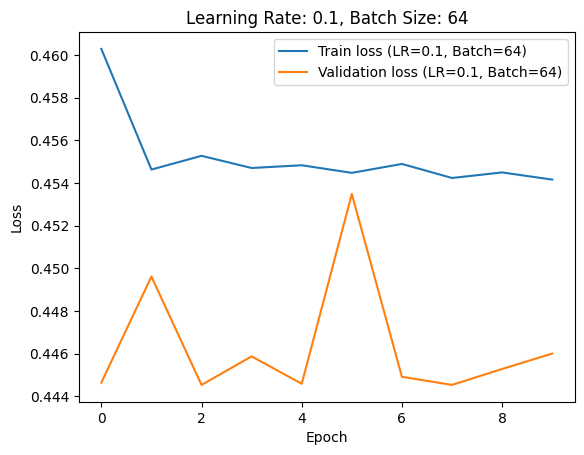

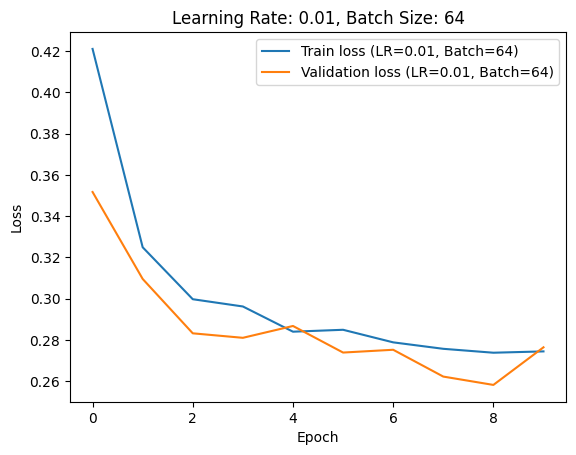

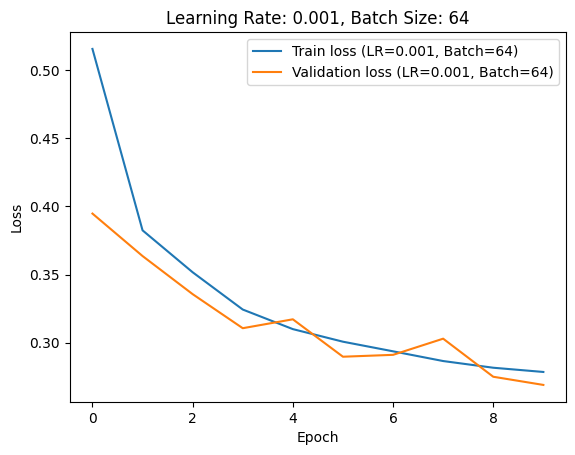

In [14]:
from tensorflow.keras.optimizers import Adam

# Define the range of batch sizes and learning rates
batch_sizes = [16, 32, 64]
learning_rates = [0.1, 0.01, 0.001]

# Iterate through different combinations of batch size and learning rate
for batch_size in batch_sizes:
    for lr in learning_rates:
        print(f"\nBatch Size: {batch_size} and Learning Rate : {lr}")
        # Define the model architecture
        model = keras.Sequential([
            layers.Dense(8, activation='relu', input_shape=(9,)),  # Input layer with 9 neurons
            layers.Dense(16, activation='relu'),
            layers.Dense(16, activation='relu'),
            layers.Dense(32, activation='relu'),
            layers.Dense(32, activation='relu'),
            layers.Dense(32, activation='relu'),
            layers.Dense(9, activation='softmax')  # Output layer with 9 neurons
        ])

        # Compile the model with the specified learning rate
        optimizer = Adam(learning_rate=lr)
        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

        # Train the model
        history = model.fit(X_train, one_hot_encoded[y_train], batch_size=batch_size, epochs=10, validation_data=(X_test, one_hot_encoded[y_test]))

        # Create separate plots for each combination
        plt.figure()
        plt.plot(history.history['loss'], label=f'Train loss (LR={lr}, Batch={batch_size})')
        plt.plot(history.history['val_loss'], label=f'Validation loss (LR={lr}, Batch={batch_size})')
        plt.title(f'Learning Rate: {lr}, Batch Size: {batch_size}')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

# Display all the separate plots
plt.show()
